# Sprawozdanie laboratorium pierwsze
Witold Jagiełło-Królikowski
s21165

Adrian Bloch

### Zadanie polega na wykorzystaniu 2 różnych klasyfikatorów oraz opisanie ich działania w sprawozdaniu

Klasyfikatory do przetestowania to:


- Drzewo decyzyjne
- SVM

Po przetestowaniu na danych z diabetes.csv, określamy procentową dokładność klasyfikatorów oraz macierze błędów, następnie jako zadanie dodatkowe określamy jaki algorytm dostarczył nam najmniej false positive


#### Import bibioltek potrzebnych do odczytywania pliku csv, tworzenie array, oraz dataFrame

In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Pobieramy dane z bazy danych diabetes.csv oraz na kolumny i wiersze

0.84
0.92


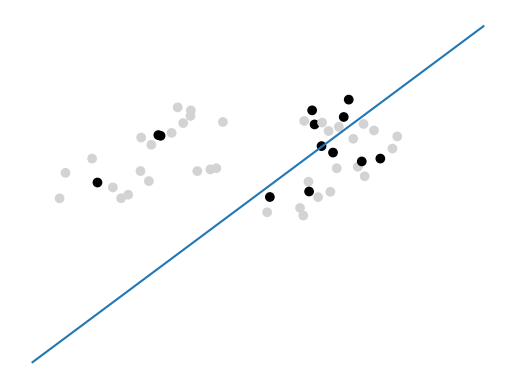

0.6
0.98


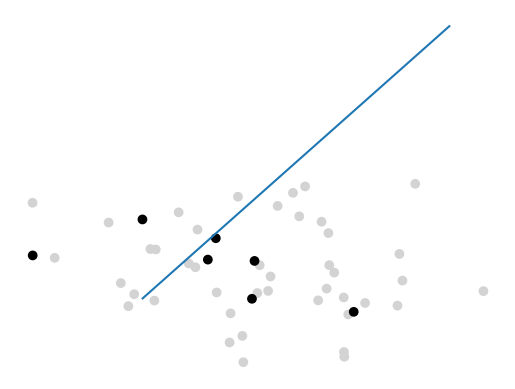

In [3]:
X = []
y = []

with open(file='money.csv', mode='r') as newFile:
    plots = csv.reader(newFile, delimiter=',')
    has_header = csv.Sniffer().has_header(newFile.read(1024))
    newFile.seek(0)
    if has_header:
        next(plots)
    for row in plots:
        X.append(row[0:4])
        y.append(row[4])


X2 = []
y2 = []

with open(file='diabetes.csv', mode='r') as newFile:
    plots = csv.reader(newFile, delimiter=',')
    has_header = csv.Sniffer().has_header(newFile.read(1024))
    newFile.seek(0)
    if has_header:
        next(plots)
    for row in plots:
        X2.append(row[0:8])
        y2.append(row[8])


X3 = []
y3 = []


classes = 4
z4, t = make_classification(100, 4, n_classes=classes, random_state=40, n_informative=2, n_clusters_per_class=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(z4, t, test_size=0.50)

model = svm.SVC(kernel='linear', random_state=0, C=1.0)

model.fit(X_train3, y_train3)

z3 = model.predict(X_test3)
t2 = model.predict(X_train3)

score = accuracy_score(z3, y_test3)
print(score)
score2 = accuracy_score(t2, y_train3)
print(score2)


color = ['black' if c == 0 else 'lightgrey' for c in z3]
plt.scatter(X_train3[:, 0], X_train3[:, 1], c=color)

# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show()

sc3 = StandardScaler()
sc3.fit(X_train3)
X_train_std = sc3.transform(X_train3)
X_test_std = sc3.transform(X_test3)


n = []
m = []

with open(file='zeszyt2.csv', mode='r') as newFile:
    plots = csv.reader(newFile, delimiter=',')
    has_header = csv.Sniffer().has_header(newFile.read(1024))
    newFile.seek(0)
    if has_header:
        next(plots)
    for row in plots:
        n.append(row[0:8])
        m.append(row[8])

classes = 8
n, t = make_classification(100, 8, n_classes=classes, random_state=60, n_informative=4, n_clusters_per_class=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(n, t, test_size=0.50)

model = svm.SVC(kernel='linear', random_state=0, C=1.0)

model.fit(X_train4, y_train4)

q = model.predict(X_test4)
q2 = model.predict(X_train4)


score3 = accuracy_score(q, y_test4)
print(score3)
score4 = accuracy_score(q2, y_train4)
print(score4)

color = ['black' if c == 0 else 'lightgrey' for c in q]
plt.scatter(X_train4[:, 0], X_train4[:, 1], c=color)

# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show()

sc = StandardScaler()
sc.fit(X_train4)
X_train_std = sc.transform(X_train4)
X_test_std = sc.transform(X_test4)





#### Następnie dzielimy pobrane danę na train na ktorych algorytmy będą sie uczyć oraz test na których będziemy sprawdzać poprawność działania

### Fałszywki

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

print("Łączna ilość danych w y: ", np.bincount(y))
print("dane poświęcone na trening",np.bincount(y_train))
print("dane poświęcone na test",np.bincount(y_test))

Łączna ilość danych w y:  [762 610]
dane poświęcone na trening [510 409]
dane poświęcone na test [252 201]


### Cukrzycy

In [5]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=1, stratify=y2)

print("Łączna ilość danych w y: ", np.bincount(y2))
print("dane poświęcone na trening",np.bincount(y_train2))
print("dane poświęcone na test",np.bincount(y_test2))

Łączna ilość danych w y:  [500 268]
dane poświęcone na trening [335 179]
dane poświęcone na test [165  89]


#### Standaryzacja cech

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc2 = StandardScaler()
sc2.fit(X_train2)
X_train_std2 = sc2.transform(X_train2)
X_test_std2 = sc2.transform(X_test2)


In [7]:
#### Import potrzebny dla algorytmu najblizszych sąsiadów

#### Trenujemy algorytm danymi z diabetes.csv

## Drzewo decyzyjne max depth 5

### Fałszywki

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
decision_tree.fit(X_train, y_train)
drzewo_wynik =  round(100*(decision_tree.score(X_test_std, y_test)))
print("Poprawność algorytmu Drzewa decyzyjnego wynosi", drzewo_wynik,"%")

y_pred_tree = decision_tree.predict(X_test)
print("Algorytm źle przyporzadkował ", (y_test != y_pred_tree).sum(), "przypadków spośród" ,     X_test_std.shape[0])
tree_macierz_bledu = confusion_matrix(y_test, y_pred_tree)
print(tree_macierz_bledu)


Poprawność algorytmu Drzewa decyzyjnego wynosi 83 %
Algorytm źle przyporzadkował  18 przypadków spośród 453
[[242  10]
 [  8 193]]


### Rysujemy naszę drzewo

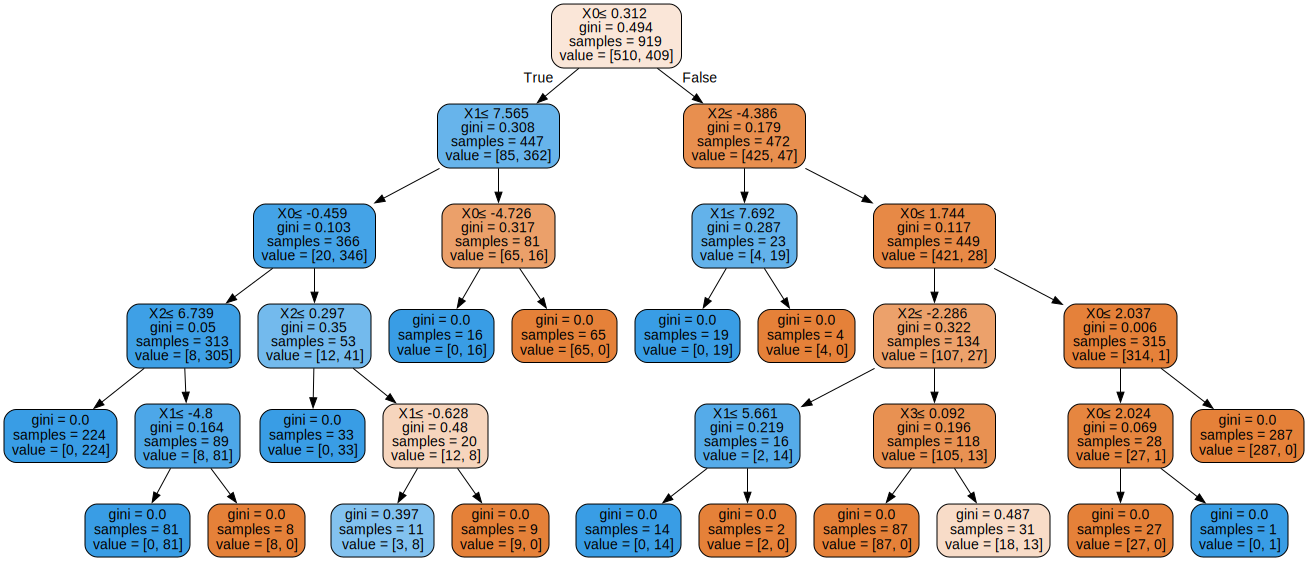

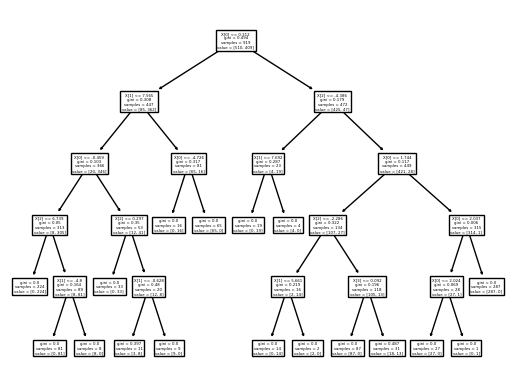

In [9]:
import graphviz
from sklearn import tree
tree.plot_tree(decision_tree)


dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Cukrzycy

In [10]:
decision_tree2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
decision_tree2.fit(X_train2, y_train2)
drzewo_wynik2 =  round(100*(decision_tree2.score(X_test_std2, y_test2)))
print("Poprawność algorytmu Drzewa decyzyjnego wynosi", drzewo_wynik2,"%")

y_pred_tree2 = decision_tree2.predict(X_test2)
print("Algorytm źle przyporzadkował ", (y_test2 != y_pred_tree2).sum(), "przypadków spośród" ,     X_test_std2.shape[0])
tree_macierz_bledu2 = confusion_matrix(y_test2, y_pred_tree2)
print(tree_macierz_bledu)

Poprawność algorytmu Drzewa decyzyjnego wynosi 65 %
Algorytm źle przyporzadkował  63 przypadków spośród 254
[[242  10]
 [  8 193]]


#### aby narysować graph inportujemy graphviz

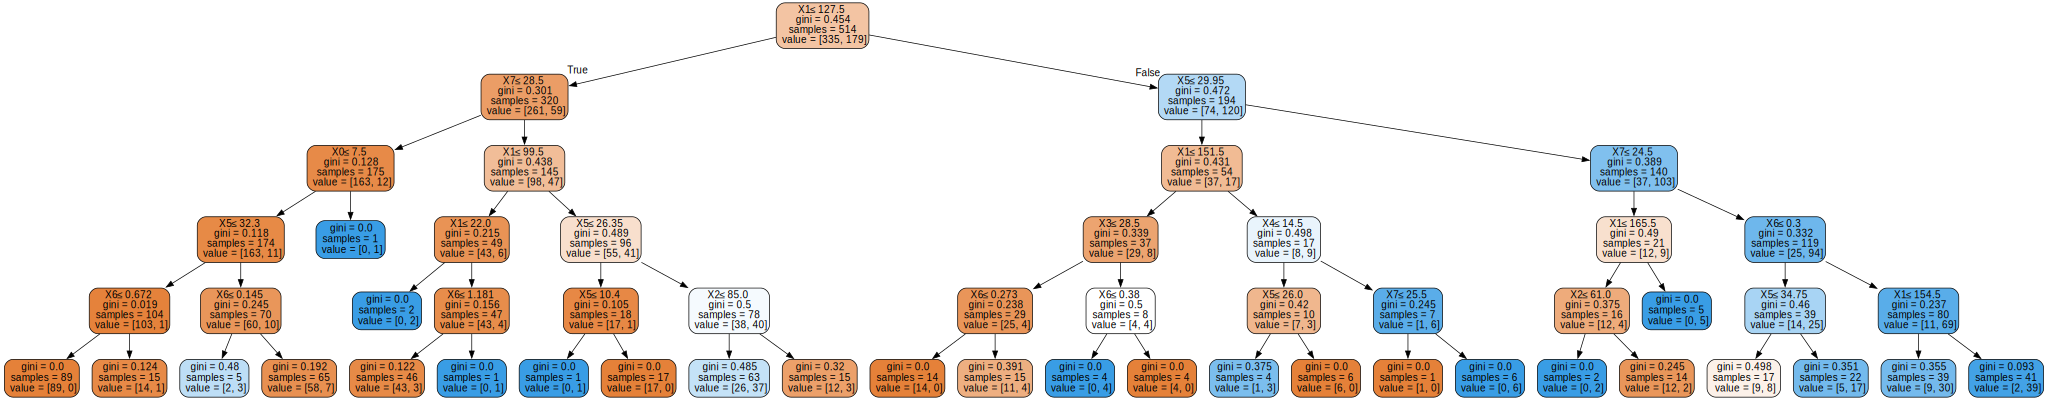

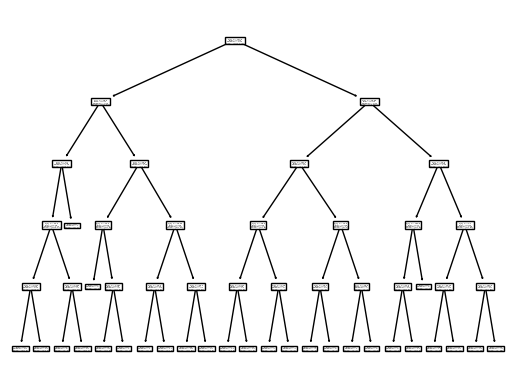

In [11]:
tree.plot_tree(decision_tree2)


dot_data = tree.export_graphviz(decision_tree2, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Aby narysowac wykres słupkowy importujemy matplotlib

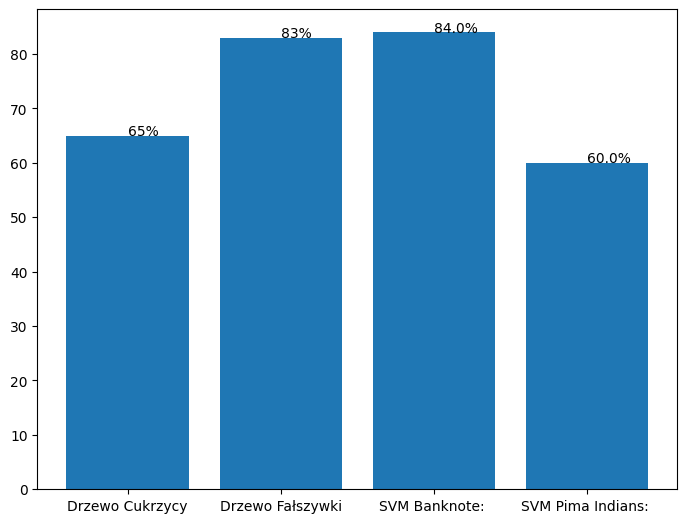

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
accuracy_of_classifiers = {
    'Drzewo Cukrzycy': drzewo_wynik2,
    'Drzewo Fałszywki': drzewo_wynik,
    'SVM Banknote: ': score*100,
    'SVM Pima Indians: ': score3*100

}

ax.bar(list(accuracy_of_classifiers.keys()), list(accuracy_of_classifiers.values()))
for a,b in zip(list(accuracy_of_classifiers.keys()), list(accuracy_of_classifiers.values())):
    plt.text(a,b, f"{round(b, 2)}%")
plt.show()

### Dodatkowe

#### Wykonujemy zestawienie wyników aby przyjrzeć się który miał najwięcej przypadków False Negative

In [13]:
classifiers_scores = {'Drzewo Cukrzycy': [drzewo_wynik2,
                                    tree_macierz_bledu2[0], tree_macierz_bledu2[1]],


                      'Drzewo Fałszywki': [drzewo_wynik,
                                        tree_macierz_bledu[0], tree_macierz_bledu[1]]}

df = pd.DataFrame(data=classifiers_scores, index=['classifiers score', 'classifier confusion matrix', ''])
df

,Drzewo Cukrzycy,Drzewo Fałszywki
classifiers score,65,83
classifier confusion matrix,"[131, 34]","[242, 10]"
,"[29, 60]","[8, 193]"
